# LAB04 Decision Tree (ID3) Algorithm (Supervised Learning)

Objectives:
1. Knowing the basics of the ID3 Algorithm
1. Loading csv data in python, (using pandas library)
1. Training and building Decision tree using ID3 algorithm from scratch
1. Predicting from the tree
1. Finding out the accuracy

In [1]:
import pandas as pd #for manipulating the csv data
import numpy as np #for mathematical calculation

In [2]:
train_data_m = pd.read_csv("PlayTennis.csv")
test_data_m = pd.read_csv("PlayTennis.csv")

In [3]:
train_data_m.head()


,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


### TASK1) Entropy Calculation (10 pts.)
Complete the function to calculate the Entrop of whole dataset
parameters:
1. Train_data (complete dataset without labels)
2. Labels (labels vector)
3. Class (list of classes) that is already done in below code

![ Entropy Calculations](res/1.png)

In [4]:
def calc_total_entropy(train_data, label, class_list):
    # Calculate entropy of the full dataset based on class distribution
    total_rows = train_data.shape[0]
    total_entropy = 0

    for c in class_list:
        label_class_count = train_data[train_data[label] == c].shape[0]
        if label_class_count != 0:
            probability_class = label_class_count / total_rows
            total_entropy += -probability_class * np.log2(probability_class)

    return total_entropy


### Calculate the entropy for feature.
* Mathematical formulation is as follows


   ![ Entropy Calculations](res/2.png)

In [5]:
## THIS FUNCTION IS COMPLETED FOR YOU. YOU MAY AID YOUR CODE WITH THIS REFERENCE
def calc_entropy(feature_value_data, label, class_list):
    class_count = feature_value_data.shape[0]
    entropy = 0

    for c in class_list:
        label_class_count = feature_value_data[feature_value_data[label] == c].shape[0]

        entropy_class = 0
        if label_class_count != 0:
            probability_class = label_class_count/class_count
            entropy_class = - probability_class * np.log2(probability_class)

        entropy += entropy_class

    return entropy

### TASK2: Calculate Information Gain (10 pts.)
* Information gain formula is given below.
* Implement the function **calc_info_gain** which should return the information gain for certain feature which is passes as parameter.

![ Entropy Calculations](res/3.png)
![ Entropy Calculations](res/4.png)
![ Entropy Calculations](res/6.png)


In [6]:
def calc_info_gain(feature_name, train_data, label, class_list):
    # Calculate the information gain of splitting on a given feature
    total_entropy = calc_total_entropy(train_data, label, class_list)
    feature_value_counts = train_data[feature_name].value_counts(sort=False)

    weighted_feature_entropy = 0
    for feature_value, count in feature_value_counts.items():
        feature_value_data = train_data[train_data[feature_name] == feature_value]
        feature_entropy = calc_entropy(feature_value_data, label, class_list)
        weighted_feature_entropy += (count / train_data.shape[0]) * feature_entropy

    info_gain = total_entropy - weighted_feature_entropy
    return info_gain



### Find Most Informative Feature (find_most_informative_feature)
* This function will return the feature with maximum gain.
* The maximum gain node will be used for splitting the tree.
* Function is already implemented for you.

In [7]:
def find_most_informative_feature(train_data, label, class_list):
    feature_list = train_data.columns.drop(label)
    max_info_gain = -1
    max_info_feature = None

    for feature in feature_list:
        feature_info_gain = calc_info_gain(feature, train_data, label, class_list)
        if max_info_gain < feature_info_gain:
            max_info_gain = feature_info_gain
            max_info_feature = feature

    return max_info_feature

### Sub Trees Generation Function
* This fuction is completed. Don't alter the function
* Understanding of this function will help you in understanding the ID3 procedure

In [8]:
def generate_sub_tree(feature_name, train_data, label, class_list):
    feature_value_count_dict = train_data[feature_name].value_counts(sort=False)
    tree = {}

    for feature_value, count in feature_value_count_dict.items():
        feature_value_data = train_data[train_data[feature_name] == feature_value]

        assigned_to_node = False
        for c in class_list:
            class_count = feature_value_data[feature_value_data[label] == c].shape[0]

            if class_count == count:
                tree[feature_value] = c
                train_data = train_data[train_data[feature_name] != feature_value]
                assigned_to_node = True
        if not assigned_to_node:
            tree[feature_value] = "?"

    return tree, train_data

### Driver Function (make_tree)
* Don't change this function. This is completed
* This will be called into ID3 driver code and rest of functionality will work when other functions are completed

In [9]:
def make_tree(root, prev_feature_value, train_data, label, class_list):
    if train_data.shape[0] != 0:
        max_info_feature = find_most_informative_feature(train_data, label, class_list)
        tree, train_data = generate_sub_tree(max_info_feature, train_data, label, class_list)
        next_root = None

        if prev_feature_value != None:
            root[prev_feature_value] = dict()
            root[prev_feature_value][max_info_feature] = tree
            next_root = root[prev_feature_value][max_info_feature]
        else:
            root[max_info_feature] = tree
            next_root = root[max_info_feature]

        for node, branch in list(next_root.items()):
            if branch == "?":
                feature_value_data = train_data[train_data[max_info_feature] == node]
                make_tree(next_root, node, feature_value_data, label, class_list)

### ID3 Driver Code (No changes requried)

In [10]:
def id3(train_data_m, label):
    train_data = train_data_m.copy()
    tree = {}
    class_list = train_data[label].unique()
    make_tree(tree, None, train_data, label, class_list)

    return tree

In [11]:
# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    tree = id3(train_data_m, 'Play Tennis')
    print(tree)


{'Outlook': {'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}, 'Overcast': 'Yes', 'Rain': {'Wind': {'Weak': 'Yes', 'Strong': 'No'}}}}


### Validate the predictions on different instances (test_data) which is already loaded in memory.

In [12]:
def predict(tree, instance):
    if not isinstance(tree, dict):
        return tree
    else:
        root_node = next(iter(tree))
        feature_value = instance[root_node]
        if feature_value in tree[root_node]:
            return predict(tree[root_node][feature_value], instance)
        else:
            return None

In [13]:
def evaluate(tree, test_data_m, label):
    correct_preditct = 0
    wrong_preditct = 0
    for index, row in test_data_m.iterrows():
        result = predict(tree, test_data_m.iloc[index])
        if result == test_data_m[label].iloc[index]:
            correct_preditct += 1
        else:
            wrong_preditct += 1
    accuracy = correct_preditct / (correct_preditct + wrong_preditct)
    return accuracy

In [14]:
accuracy = evaluate(tree, test_data_m, 'Play Tennis')
print("accuracy:", accuracy)

accuracy: 1.0


## **SKLEARN Decision Tree Code with Graphviz Visualization**

**Required Library**

In [15]:
pip install graphviz


# **Import Required Libraries**

In [16]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import graphviz


# **Load and Preprocess Data**

In [18]:
df = pd.read_csv("PlayTennis.csv")
print("Columns:", df.columns.tolist())


Columns: ['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play Tennis']


In [22]:

# Encode categorical variables using LabelEncoder
le = preprocessing.LabelEncoder()
encoded_df = df.apply(le.fit_transform)

# Use the correct target column name
target_column = "Play Tennis"

# Split features and target
X = encoded_df.drop(target_column, axis=1)
y = encoded_df[target_column]


# **Train Decision Tree Using ID3 (Entropy)**

In [23]:
# Create and train classifier using 'entropy' criterion (ID3 logic)
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X, y)


# **Visualize the Tree using Graphviz**

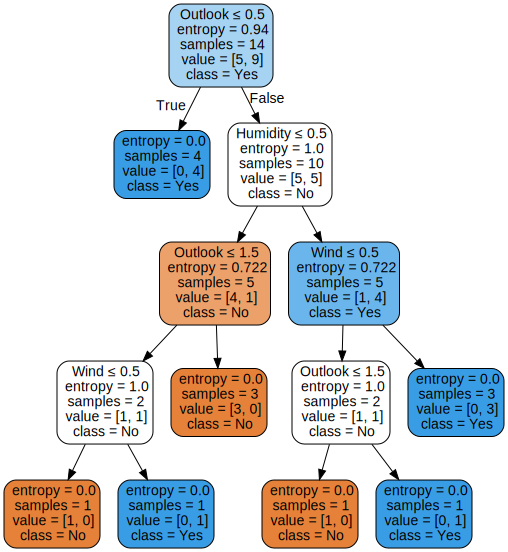

In [24]:
# Feature names and class names
feature_names = list(X.columns)
class_names = le.classes_  # ['No', 'Yes']

# Export tree to DOT format
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=feature_names,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Render tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree_sklearn", format='png', cleanup=True)  # saves as PNG
graph  # displays inline in notebook


# **Accuracy Comparison**

In [25]:
# Predict using sklearn
y_pred_sklearn = clf.predict(X)

# Accuracy
accuracy_sklearn = accuracy_score(y, y_pred_sklearn)
print(f"Sklearn Decision Tree Accuracy: {accuracy_sklearn * 100:.2f}%")


Sklearn Decision Tree Accuracy: 100.00%
